# 🐸 파이썬으로 데이터 주무르기 

## 4장 셀프 주유소는 정말 저렴할까

일자: 2020-03-31 ~

- [opinet - 싼 주유소 찾기 - 지역별](http://www.opinet.co.kr/searRgSelect.do)
- pip install selenium 터미널에 입력 
- Selenium 모듈 뿐만 아니라 브라우저에 맞춰 웹 드라이버를 다운받아야 함. 
- [본인에게 맞는 웹브라우저 별로 드라이브 설치 - 경로설정 주의](https://sacko.tistory.com/13)

In [46]:
from selenium import webdriver

- 이동경로 확인: 분홍색으로 적혀있는 부분에서 확인할 수 있음!
- 'Chrome이 자동화된 테스트 소프트웨어에 의해 제어되고 있습니다'가 뜬 문구의 웹 브라우저는 되도록 건들이지 말 것!

![파일 경로](file_path_img.png)

In [13]:
driver = webdriver.Chrome('/Users/harampark/Documents/chromedriver')
driver.get("https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com")

In [9]:
# 스크린샷 - 파일 경로 확인, 확장자 확인, 미리 폴더 만들어놓아야 함
driver.save_screenshot('images/001.png')

True

In [14]:
elem_login = driver.find_element_by_id("id")
elem_login.clear()
elem_login.send_keys("**********")

elem_login = driver.find_element_by_id("pw")
elem_login.clear()
elem_login.send_keys("**********")

In [15]:
xpath = """//*[@id="log.login"]"""
driver.find_element_by_xpath(xpath).click()

이렇게 하면, CAPCHA에 걸림. 네이버 쉿키를 열심히 일하네^^ 

그래서 저는 다음으로 했삼^^

In [25]:
from selenium import webdriver
import time

driver = webdriver.Chrome('/Users/harampark/Documents/chromedriver')
driver.get("https://accounts.kakao.com/login?continue=https%3A%2F%2Flogins.daum.net%2Faccounts%2Fksso.do%3Frescue%3Dtrue%26url%3Dhttps%253A%252F%252Fwww.daum.net%252F")

elem_login = driver.find_element_by_id("id_email_2")
elem_login.clear()
elem_login.send_keys("**********")
time.sleep(3)

elem_login = driver.find_element_by_id("id_password_3")
elem_login.clear()
elem_login.send_keys("***********")
time.sleep(3)

xpath = """//*[@id="login-form"]/fieldset/div[8]/button"""
driver.find_element_by_xpath(xpath).click()

In [26]:
# 메일 접근 
driver.get("https://mail.daum.net/")

In [27]:
from bs4 import BeautifulSoup

html = driver.page_source # 현재 접근한 페이지의 소스를 받을 수 있음.
soup = BeautifulSoup(html, 'html.parser')

In [28]:
raw_list = soup.find_all('a', 'link_from')
raw_list

[<a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"영어이야기클럽 운영자" &lt;yhhah@hanmail.net&gt;'>영어이야기클럽 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨

In [31]:
raw_list[0].get_text()

'코아벨스 미국법 연구소 운영자'

In [32]:
for n in range(0, len(raw_list)):
    send_list = raw_list[n].get_text()
    print(send_list)

코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
영어이야기클럽 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자


메일 보낸 사람 리스트 확보 

In [33]:
driver.close()  # 크롬 드라이버 종료

In [84]:
driver = webdriver.Chrome('/Users/harampark/Documents/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")
driver.get("http://www.opinet.co.kr/searRgSelect.do") # 두번 해야 들어가 짐.

In [85]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [86]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [87]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

In [88]:
#조회버튼의 Xpath를 찾아서 클릭
xpath ='''//*[@id="searRgSelect"]/span'''
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [89]:
xpath ='''//*[@id="glopopd_excel"]/span'''
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [93]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names): 
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath ='''//*[@id="searRgSelect"]/span'''
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath ='''//*[@id="glopopd_excel"]/span'''
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

In [94]:
driver.close()

In [1]:
import pandas as pd 
from glob import glob

In [5]:
glob('location_of_gasstation/지역*.xls')

['location_of_gasstation/지역_위치별(주유소) (9).xls',
 'location_of_gasstation/지역_위치별(주유소) (12).xls',
 'location_of_gasstation/지역_위치별(주유소) (5).xls',
 'location_of_gasstation/지역_위치별(주유소) (24).xls',
 'location_of_gasstation/지역_위치별(주유소) (4).xls',
 'location_of_gasstation/지역_위치별(주유소) (13).xls',
 'location_of_gasstation/지역_위치별(주유소) (8).xls',
 'location_of_gasstation/지역_위치별(주유소) (3).xls',
 'location_of_gasstation/지역_위치별(주유소) (18).xls',
 'location_of_gasstation/지역_위치별(주유소) (22).xls',
 'location_of_gasstation/지역_위치별(주유소) (14).xls',
 'location_of_gasstation/지역_위치별(주유소) (15).xls',
 'location_of_gasstation/지역_위치별(주유소) (23).xls',
 'location_of_gasstation/지역_위치별(주유소) (19).xls',
 'location_of_gasstation/지역_위치별(주유소) (2).xls',
 'location_of_gasstation/지역_위치별(주유소) (20).xls',
 'location_of_gasstation/지역_위치별(주유소) (1).xls',
 'location_of_gasstation/지역_위치별(주유소) (16).xls',
 'location_of_gasstation/지역_위치별(주유소) (17).xls',
 'location_of_gasstation/지역_위치별(주유소) (21).xls',
 'location_of_gasstation/지역_위치별(주유소) (10).xls',

In [132]:
stations_files = glob('location_of_gasstation/*.*')
stations_files

['location_of_gasstation/지역_위치별(주유소) (9).xls',
 'location_of_gasstation/지역_위치별(주유소) (12).xls',
 'location_of_gasstation/지역_위치별(주유소) (5).xls',
 'location_of_gasstation/지역_위치별(주유소) (24).xls',
 'location_of_gasstation/지역_위치별(주유소) (4).xls',
 'location_of_gasstation/지역_위치별(주유소) (13).xls',
 'location_of_gasstation/지역_위치별(주유소) (8).xls',
 'location_of_gasstation/지역_위치별(주유소) (3).xls',
 'location_of_gasstation/지역_위치별(주유소) (18).xls',
 'location_of_gasstation/지역_위치별(주유소) (22).xls',
 'location_of_gasstation/지역_위치별(주유소) (14).xls',
 'location_of_gasstation/지역_위치별(주유소) (15).xls',
 'location_of_gasstation/지역_위치별(주유소) (23).xls',
 'location_of_gasstation/지역_위치별(주유소) (19).xls',
 'location_of_gasstation/지역_위치별(주유소) (2).xls',
 'location_of_gasstation/지역_위치별(주유소) (20).xls',
 'location_of_gasstation/지역_위치별(주유소) (1).xls',
 'location_of_gasstation/지역_위치별(주유소) (16).xls',
 'location_of_gasstation/지역_위치별(주유소) (17).xls',
 'location_of_gasstation/지역_위치별(주유소) (21).xls',
 'location_of_gasstation/지역_위치별(주유소) (10).xls',

In [11]:
file = pd.read_excel('location_of_gasstation/지역_위치별(주유소) (9).xls')
file.head()

,지역_위치별(주유소),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위 : 원/리터)
1,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
2,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1285,1085,900
3,서울특별시,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),현대오일뱅크,02-902-5189,N,-,1285,1085,-
4,서울특별시,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),S-OIL,02-996-6640,Y,-,1289,1089,-


In [133]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1285,1085,900
1,서울특별시,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),현대오일뱅크,02-902-5189,N,-,1285,1085,-
2,서울특별시,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),S-OIL,02-996-6640,Y,-,1289,1089,-
3,서울특별시,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),SK에너지,02-996-5151,Y,-,1292,1092,-
4,서울특별시,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),SK에너지,02-3492-7371,Y,-,1299,1099,-


In [134]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 9
Data columns (total 10 columns):
지역       501 non-null object
상호       501 non-null object
주소       501 non-null object
상표       501 non-null object
전화번호     501 non-null object
셀프여부     501 non-null object
고급휘발유    501 non-null object
휘발유      501 non-null object
경유       501 non-null object
실내등유     501 non-null object
dtypes: object(10)
memory usage: 43.1+ KB


In [135]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1285,N,현대오일뱅크
1,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1285,N,현대오일뱅크
2,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),1289,Y,S-OIL
3,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1292,Y,SK에너지
4,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1299,Y,SK에너지


In [136]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1285,N,현대오일뱅크,도봉구
1,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1285,N,현대오일뱅크,도봉구
2,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),1289,Y,S-OIL,도봉구
3,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1292,Y,SK에너지,도봉구
4,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1299,Y,SK에너지,도봉구


In [137]:
stations['구'].unique()

array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
       '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
       '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object)

In [138]:
len(stations['구'].unique())

25

In [139]:
stations[stations['구'] == '서울특별시'] # 예외상황 없음

,Oil_store,주소,가격,셀프,상표,구


In [140]:
stations['가격'].unique()

array([1285, 1289, 1292, 1299, 1309, 1322, 1325, 1337, 1365, 1379, 1383,
       1395, 1409, 1498, '1477', '1479', '1487', '1498', '1567', '1569',
       '1599', '1659', '1669', '1749', '1849', '1869', '-', 1326, 1327,
       1375, 1387, 1388, 1398, 1424, 1425, 1430, 1479, 1560, 1287, 1307,
       1348, 1378, 1389, 1399, 1404, 1447, 1448, 1459, 1478, 1488, 1499,
       1509, 1518, 1528, 1534, 1550, 1344, 1349, 1359, 1414, 1680, 1917,
       1357, 1374, 1392, 1405, 1480, 1540, 1549, 1598, 1284, 1317, 1319,
       1323, 1335, 1346, 1347, 1364, 1367, 1397, 1434, 1439, 1445, 1454,
       1455, 1465, 1491, 1535, 1565, 1789, 1315, 1338, 1339, 1356, 1396,
       1410, 1489, 1495, 1639, 1787, 1415, 1420, 1578, 1898, 1998, 1999,
       2076, 2088, 1457, 1458, 1466, 1467, 1468, 1469, 1497, 1545, 1589,
       1879, 1978, 1363, 1428, 1475, 1687, 1798, 1968, 1688, 1869, 2021,
       2035, 2059, 2069, 2099, 1329, 1369, 1438, 1449, 1580, 1697, 1799,
       1840, 1890, 1915, 1929, 1936, 1943, 1259, 127

In [141]:
stations[stations['가격'] == '-']  # 가격이 없는 것은 제외하겠삼

,Oil_store,주소,가격,셀프,상표,구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
40,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
41,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [142]:
stations = stations[stations['가격'] != '-']
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구


In [143]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 9
Data columns (total 6 columns):
Oil_store    497 non-null object
주소           497 non-null object
가격           497 non-null object
셀프           497 non-null object
상표           497 non-null object
구            497 non-null object
dtypes: object(6)
memory usage: 27.2+ KB


In [144]:
stations['가격'] = stations['가격'].astype('float')
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 9
Data columns (total 6 columns):
Oil_store    497 non-null object
주소           497 non-null object
가격           497 non-null float64
셀프           497 non-null object
상표           497 non-null object
구            497 non-null object
dtypes: float64(1), object(5)
memory usage: 27.2+ KB


In [61]:
stations.reset_index(inplace=True)
stations.head(30)

,level_0,index,Oil_store,주소,가격,셀프,상표,구
0,0,0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1285.0,N,현대오일뱅크,도봉구
1,1,1,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1285.0,N,현대오일뱅크,도봉구
2,2,2,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),1289.0,Y,S-OIL,도봉구
3,3,3,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1292.0,Y,SK에너지,도봉구
4,4,4,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1299.0,Y,SK에너지,도봉구
5,5,5,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,1299.0,Y,GS칼텍스,도봉구
6,6,6,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),1299.0,Y,GS칼텍스,도봉구
7,7,7,쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1309.0,Y,S-OIL,도봉구
8,8,8,삼미북부셀프주유소,서울특별시 도봉구 도봉로 437 (쌍문동),1322.0,Y,SK에너지,도봉구
9,9,9,서현주유소,서울 도봉구 방학로 142 (방학동),1325.0,Y,S-OIL,도봉구


In [145]:
# stations.drop(['level_0', 'index'],1, inplace=True)
stations.head(20)

,Oil_store,주소,가격,셀프,상표,구
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1285.0,N,현대오일뱅크,도봉구
1,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1285.0,N,현대오일뱅크,도봉구
2,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),1289.0,Y,S-OIL,도봉구
3,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1292.0,Y,SK에너지,도봉구
4,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1299.0,Y,SK에너지,도봉구
5,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,1299.0,Y,GS칼텍스,도봉구
6,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),1299.0,Y,GS칼텍스,도봉구
7,쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1309.0,Y,S-OIL,도봉구
8,삼미북부셀프주유소,서울특별시 도봉구 도봉로 437 (쌍문동),1322.0,Y,SK에너지,도봉구
9,서현주유소,서울 도봉구 방학로 142 (방학동),1325.0,Y,S-OIL,도봉구


In [146]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 9
Data columns (total 6 columns):
Oil_store    497 non-null object
주소           497 non-null object
가격           497 non-null float64
셀프           497 non-null object
상표           497 non-null object
구            497 non-null object
dtypes: float64(1), object(5)
memory usage: 27.2+ KB


In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

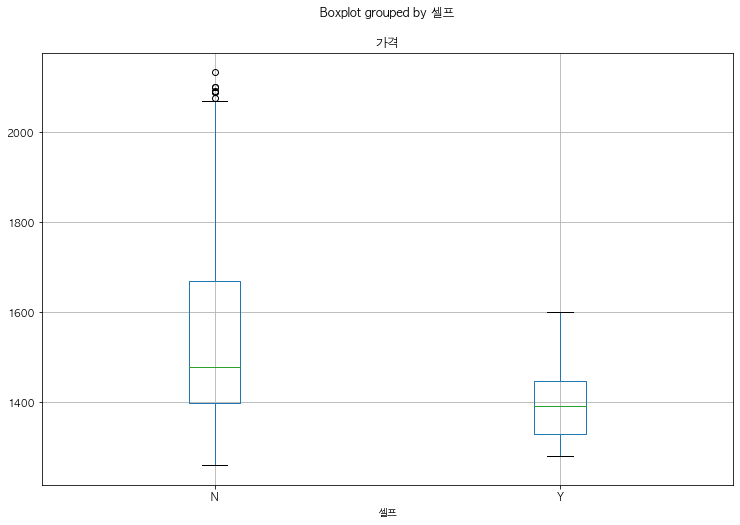

In [148]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

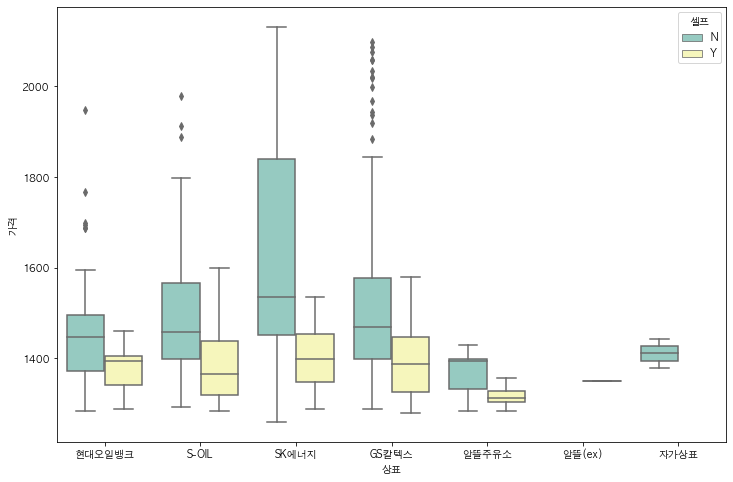

In [149]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

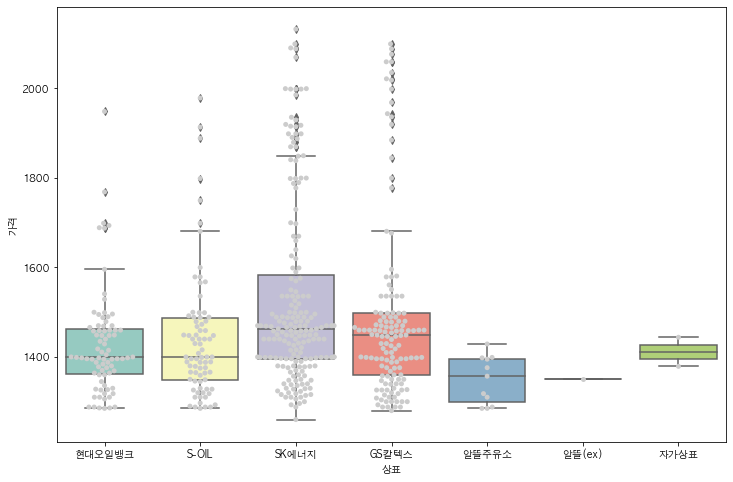

In [150]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.8')  # 1로하면 환공포증 느낌...
plt.show()

In [151]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [152]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2132.0,N,SK에너지,강남구
11,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2099.0,N,GS칼텍스,중구
10,서남주유소,서울 중구 통일로 30,2099.0,N,SK에너지,중구
13,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2090.0,N,SK에너지,용산구
9,장충주유소,서울 중구 장충단로 202 (장충동1가),2088.0,N,SK에너지,중구
8,경복궁주유소,서울 종로구 율곡로 6 (중학동),2088.0,N,GS칼텍스,종로구
7,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2076.0,N,GS칼텍스,종로구
8,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2069.0,N,SK에너지,중구
7,필동주유소,서울 중구 퇴계로 196 (필동2가),2059.0,N,GS칼텍스,중구
12,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구


In [153]:
# 우리집 서대문구에서 싼 주유소가 어딨는지 알아봤음. 
stations[stations['구'] == '서대문구'].sort_values(by='가격')

,Oil_store,주소,가격,셀프,상표,구
0,(주)가재울뉴타운주유소,서울 서대문구 모래내로 205,1344.0,Y,현대오일뱅크,서대문구
1,(주)마봉 구도일주유소 두꺼비,서울 서대문구 성산로 312 (연희동),1344.0,Y,S-OIL,서대문구
2,(주)마봉 신우주유소,서울 서대문구 가좌로 106 (홍은동),1349.0,Y,S-OIL,서대문구
3,남정주유소,서울특별시 서대문구 모래내로 243 (남가좌동),1349.0,N,GS칼텍스,서대문구
4,(주)창원이엔지 홍제지점,서울 서대문구 통일로 455 (홍제동),1359.0,N,현대오일뱅크,서대문구
5,지에스칼텍스(주)홍제동주유소,서울 서대문구 통일로 372,1375.0,Y,GS칼텍스,서대문구
6,코리아상사연세주유소,서울 서대문구 연희로 184,1379.0,Y,GS칼텍스,서대문구
7,삼보셀프주유소,서울 서대문구 연희로 78 (연희동),1398.0,Y,SK에너지,서대문구
8,중앙에너비스 동교지점,서울 서대문구 연희로 12 (창천동),1398.0,Y,SK에너지,서대문구
9,연희주유소,서울 서대문구 연희로 129 (연희동 89-7번지),1398.0,N,SK에너지,서대문구


In [154]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
0,(주)에프알엔디 직영 송정주유소,서울 강북구 인수봉로 185 (수유동),1259.0,N,SK에너지,강북구
1,수유동주유소,서울 강북구 도봉로 395 (수유동),1279.0,Y,GS칼텍스,강북구
1,형산석유(주)원주유소,서울 양천구 남부순환로 408,1284.0,N,현대오일뱅크,양천구
0,현대주유소,서울 양천구 남부순환로 372 (신월동),1284.0,Y,S-OIL,양천구
1,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1284.0,Y,알뜰주유소,강서구
0,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1284.0,N,알뜰주유소,강서구
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1285.0,N,현대오일뱅크,도봉구
1,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1285.0,N,현대오일뱅크,도봉구
3,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1287.0,N,현대오일뱅크,중랑구
3,강산제2주유소,서울 성북구 보국문로 52,1287.0,Y,현대오일뱅크,성북구


In [155]:
import numpy as np 
gu_data = pd.pivot_table(stations, index=['구'], values=["가격"], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1639.500000
강동구,1490.875000
강북구,1337.384615
강서구,1412.558824
관악구,1481.062500


In [156]:
geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

In [158]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2132.0,N,SK에너지,강남구
11,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2099.0,N,GS칼텍스,중구
10,서남주유소,서울 중구 통일로 30,2099.0,N,SK에너지,중구
13,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2090.0,N,SK에너지,용산구
9,장충주유소,서울 중구 장충단로 202 (장충동1가),2088.0,N,SK에너지,중구
8,경복궁주유소,서울 종로구 율곡로 6 (중학동),2088.0,N,GS칼텍스,종로구
7,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2076.0,N,GS칼텍스,종로구
8,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2069.0,N,SK에너지,중구
7,필동주유소,서울 중구 퇴계로 196 (필동2가),2059.0,N,GS칼텍스,중구
12,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구


In [200]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
0,(주)에프알엔디 직영 송정주유소,서울 강북구 인수봉로 185 (수유동),1259.0,N,SK에너지,강북구
1,수유동주유소,서울 강북구 도봉로 395 (수유동),1279.0,Y,GS칼텍스,강북구
1,형산석유(주)원주유소,서울 양천구 남부순환로 408,1284.0,N,현대오일뱅크,양천구
0,현대주유소,서울 양천구 남부순환로 372 (신월동),1284.0,Y,S-OIL,양천구
1,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1284.0,Y,알뜰주유소,강서구
0,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1284.0,N,알뜰주유소,강서구
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1285.0,N,현대오일뱅크,도봉구
1,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1285.0,N,현대오일뱅크,도봉구
3,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1287.0,N,현대오일뱅크,중랑구
3,강산제2주유소,서울 성북구 보국문로 52,1287.0,Y,현대오일뱅크,성북구


In [160]:
gmaps_key = "************"
gmaps = googlemaps.Client(key=gmaps_key)

In [167]:
str(oil_price_top10['주소'][39]).split('(')

['서울 강남구 언주로 716 ', '논현동)']

In [225]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
    tmp_map = gmaps.geocode(tmp_add)

    tmp_loc = tmp_map[0].get('geometry').get('location')
    lat.append(tmp_loc['lat'])
    lng.append(tmp_loc['lng'])

oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2132.0,N,SK에너지,강남구,37.517636,127.035756
11,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2099.0,N,GS칼텍스,중구,37.557001,126.974495
10,서남주유소,서울 중구 통일로 30,2099.0,N,SK에너지,중구,37.558348,126.972090
13,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2090.0,N,SK에너지,용산구,37.550179,126.972463
9,장충주유소,서울 중구 장충단로 202 (장충동1가),2088.0,N,SK에너지,중구,37.562719,127.007010
8,경복궁주유소,서울 종로구 율곡로 6 (중학동),2088.0,N,GS칼텍스,종로구,37.575105,126.980081
7,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2076.0,N,GS칼텍스,종로구,37.574464,126.966618
8,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2069.0,N,SK에너지,중구,37.575105,126.980081
7,필동주유소,서울 중구 퇴계로 196 (필동2가),2059.0,N,GS칼텍스,중구,37.574464,126.966618
12,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구,37.552290,126.968935


In [227]:
oil_price_top10.reset_index(inplace=True)
oil_price_top10

,index,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2132.0,N,SK에너지,강남구,37.517636,127.035756
1,11,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2099.0,N,GS칼텍스,중구,37.557001,126.974495
2,10,서남주유소,서울 중구 통일로 30,2099.0,N,SK에너지,중구,37.558348,126.972090
3,13,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2090.0,N,SK에너지,용산구,37.550179,126.972463
4,9,장충주유소,서울 중구 장충단로 202 (장충동1가),2088.0,N,SK에너지,중구,37.562719,127.007010
5,8,경복궁주유소,서울 종로구 율곡로 6 (중학동),2088.0,N,GS칼텍스,종로구,37.575105,126.980081
6,7,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2076.0,N,GS칼텍스,종로구,37.574464,126.966618
7,8,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2069.0,N,SK에너지,중구,37.575105,126.980081
8,7,필동주유소,서울 중구 퇴계로 196 (필동2가),2059.0,N,GS칼텍스,중구,37.574464,126.966618
9,12,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구,37.552290,126.968935


In [228]:
oil_price_top10.drop('index',1,inplace=True)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,뉴서울(강남),서울 강남구 언주로 716 (논현동),2132.0,N,SK에너지,강남구,37.517636,127.035756
1,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2099.0,N,GS칼텍스,중구,37.557001,126.974495
2,서남주유소,서울 중구 통일로 30,2099.0,N,SK에너지,중구,37.558348,126.972090
3,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2090.0,N,SK에너지,용산구,37.550179,126.972463
4,장충주유소,서울 중구 장충단로 202 (장충동1가),2088.0,N,SK에너지,중구,37.562719,127.007010
5,경복궁주유소,서울 종로구 율곡로 6 (중학동),2088.0,N,GS칼텍스,종로구,37.575105,126.980081
6,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2076.0,N,GS칼텍스,종로구,37.574464,126.966618
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2069.0,N,SK에너지,중구,37.575105,126.980081
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2059.0,N,GS칼텍스,중구,37.574464,126.966618
9,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구,37.552290,126.968935


In [230]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan !')
        
oil_price_bottom10['lat']=lat
oil_price_bottom10['lng']=lng
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,(주)에프알엔디 직영 송정주유소,서울 강북구 인수봉로 185 (수유동),1259.0,N,SK에너지,강북구,37.636166,127.012791
1,수유동주유소,서울 강북구 도봉로 395 (수유동),1279.0,Y,GS칼텍스,강북구,37.642140,127.029568
2,형산석유(주)원주유소,서울 양천구 남부순환로 408,1284.0,N,현대오일뱅크,양천구,37.531003,126.831022
3,현대주유소,서울 양천구 남부순환로 372 (신월동),1284.0,Y,S-OIL,양천구,37.533811,126.829240
4,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1284.0,Y,알뜰주유소,강서구,37.540657,126.841506
5,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1284.0,N,알뜰주유소,강서구,37.531554,126.856024
6,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1285.0,N,현대오일뱅크,도봉구,37.674434,127.044051
7,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1285.0,N,현대오일뱅크,도봉구,37.657714,127.040569
8,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1287.0,N,현대오일뱅크,중랑구,37.587170,127.080217
9,강산제2주유소,서울 성북구 보국문로 52,1287.0,Y,현대오일뱅크,성북구,37.609163,127.010074


In [229]:
for n in oil_price_top10.index:
    print([oil_price_top10['lat'][n], oil_price_top10['lng'][n]])

[37.51763589999999, 127.0357559]
[37.5570008, 126.9744945]
[37.5583477, 126.9720901]
[37.55017850000001, 126.9724626]
[37.5627192, 127.0070101]
[37.5751055, 126.9800814]
[37.5744645, 126.9666181]
[37.5751055, 126.9800814]
[37.5744645, 126.9666181]
[37.5522895, 126.9689354]


In [231]:
for n in oil_price_bottom10.index:
    print([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]])

[37.6361659, 127.0127908]
[37.6421401, 127.0295678]
[37.53100269999999, 126.8310216]
[37.5338107, 126.8292398]
[37.54065689999999, 126.8415062]
[37.5315539, 126.8560239]
[37.674434, 127.0440507]
[37.6577143, 127.0405693]
[37.58717, 127.0802173]
[37.6091627, 127.0100739]


In [232]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map